# Imports

In [1]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pandas
import numpy
import data_massage
import itertools
import matplotlib.pyplot as plt
import arch
import pmdarima

In [2]:
metadata, full_data, induction_only = data_massage.load_data()
summarized_data = data_massage.summarize_data(metadata, induction_only)
cache = {}

features = ["R_mean", "Temp.", "Humidity"]
banana_data = induction_only[induction_only["label"] == "banana"]
wine_data = induction_only[induction_only["label"] == "wine"]
background_data = induction_only[induction_only["label"] == "background"]

In [3]:
def garch_synthetic():
    banana_garch = arch.arch_model(banana_data["R_mean"], vol="Garch", p=2, q=2)
    wine_garch = arch.arch_model(wine_data["R_mean"], vol="Garch", p=2, q=2)
    background_garch = arch.arch_model(background_data["R_mean"], vol="Garch", p=2, q=2)

    banana_garch_results = banana_garch.fit()
    wine_garch_results = wine_garch.fit()
    background_garch_results = background_garch.fit()

    banana_forecast = banana_garch_results.forecast(horizon=int(0.2 * (len(banana_data) / 0.8)), reindex=False)
    wine_forecast = wine_garch_results.forecast(horizon=int(0.2 * (len(wine_data) / 0.8)), reindex=False)
    background_forecast = background_garch_results.forecast(horizon=int(0.2 * (len(background_data) / 0.8)), reindex=False)

    banana_synthetic_values = numpy.unique((banana_forecast.mean + banana_forecast.variance).values[0])
    wine_synthetic_values = numpy.unique((wine_forecast.mean + wine_forecast.variance).values[0])
    background_synthetic_values = numpy.unique((background_forecast.mean + background_forecast.variance).values[0])

    banana_synthetic_df = pandas.DataFrame({"R_mean": banana_synthetic_values})
    banana_synthetic_df["Label"] = "banana"
    wine_synthetic_df = pandas.DataFrame({"R_mean": wine_synthetic_values})
    wine_synthetic_df["Label"] = "wine"
    background_synthetic_df = pandas.DataFrame({"R_mean": background_synthetic_values})
    background_synthetic_df["Label"] = "background"

    return pandas.concat([banana_synthetic_df, wine_synthetic_df, background_synthetic_df])


def arima_synthetic():
    banana_model = pmdarima.arima.ARIMA(order=(1,1,1))
    wine_model = pmdarima.arima.ARIMA(order=(1,1,1))
    background_model = pmdarima.arima.ARIMA(order=(1,1,1))
    
    banana_model.fit(banana_data["R_mean"])
    wine_model.fit(wine_data["R_mean"])
    background_model.fit(background_data["R_mean"])
    
    banana_synthetic_values = numpy.unique(banana_model.predict(int(0.2 * (len(banana_data) / 0.8))))
    wine_synthetic_values = numpy.unique(wine_model.predict(int(0.2 * (len(wine_data) / 0.8))))
    background_synthetic_values = numpy.unique(background_model.predict(int(0.2 * (len(background_data) / 0.8))))

    banana_synthetic_df = pandas.DataFrame({"R_mean": banana_synthetic_values})
    banana_synthetic_df["Label"] = "banana"
    wine_synthetic_df = pandas.DataFrame({"R_mean": wine_synthetic_values})
    wine_synthetic_df["Label"] = "wine"
    background_synthetic_df = pandas.DataFrame({"R_mean": background_synthetic_values})
    background_synthetic_df["Label"] = "background"
    
    return pandas.concat([banana_synthetic_df, wine_synthetic_df, background_synthetic_df])

In [4]:
garch_synthetic_dataset = garch_synthetic()
arima_synthetic_dataset = arima_synthetic()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 15948677964.431498
Iteration:      2,   Func. Count:     25,   Neg. LLF: 253545815232.1062
Iteration:      3,   Func. Count:     33,   Neg. LLF: 77562599.69554912
Iteration:      4,   Func. Count:     43,   Neg. LLF: 110359715.30174972
Iteration:      5,   Func. Count:     55,   Neg. LLF: 259303.16970806097
Optimization terminated successfully    (Exit mode 0)
            Current function value: 259303.16833332097
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      8,   Neg. LLF: 237144836.1078586
Iteration:      2,   Func. Count:     23,   Neg. LLF: 2712767.356171289
Iteration:      3,   Func. Count:     36,   Neg. LLF: 387151.78015036375
Iteration:      4,   Func. Count:     43,   Neg. LLF: 3131168.8411775925
Iteration:      5,   Func. Count:     54,   Neg. LLF: 5842068.579411248
Iteration:      6,   Func. Count:     65,   Neg. LLF: 387105.711770

/home/saba/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/saba/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/saba/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/saba/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/saba/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. 

In [5]:
garch_train_x, garch_test_x, garch_train_y, garch_test_y = train_test_split(
      garch_synthetic_dataset["R_mean"]
    , garch_synthetic_dataset["Label"]
    , test_size=0.2
    , stratify=garch_synthetic_dataset["Label"]
    , random_state=7
)

arima_train_x, arima_test_x, arima_train_y, arima_test_y = train_test_split(
      arima_synthetic_dataset["R_mean"]
    , arima_synthetic_dataset["Label"]
    , test_size=0.2
    , stratify=arima_synthetic_dataset["Label"]
    , random_state=7
)

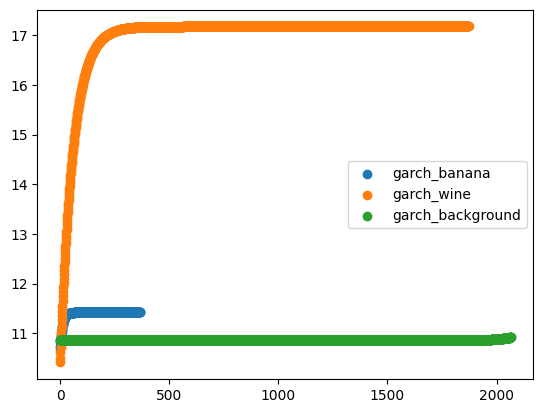

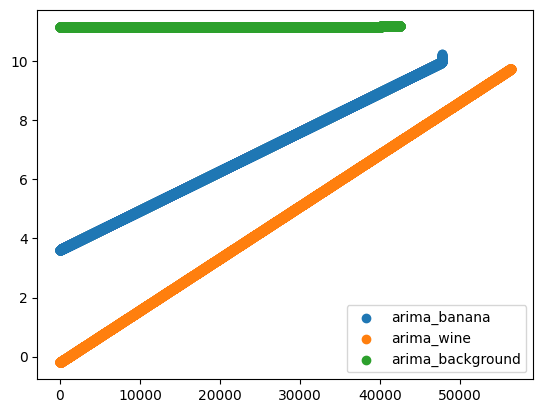

In [25]:
for label in garch_synthetic_dataset["Label"].unique():
    dataset = garch_synthetic_dataset[garch_synthetic_dataset["Label"] == label]
    plt.scatter(range(len(dataset)), dataset["R_mean"], label="garch_{}".format(label))

plt.legend()
plt.show()

for label in arima_synthetic_dataset["Label"].unique():
    dataset = arima_synthetic_dataset[arima_synthetic_dataset["Label"] == label]
    plt.scatter(range(len(dataset)), dataset["R_mean"], label="arima_{}".format(label))

plt.legend()
plt.show()

In [9]:
print(len(garch_synthetic_dataset), len(arima_synthetic_dataset))
print(len(garch_synthetic_dataset[garch_synthetic_dataset["Label"] == "banana"]))
print(len(garch_synthetic_dataset[garch_synthetic_dataset["Label"] == "wine"]))
print(len(garch_synthetic_dataset[garch_synthetic_dataset["Label"] == "background"]))
print(len(arima_synthetic_dataset[arima_synthetic_dataset["Label"] == "banana"]))
print(len(arima_synthetic_dataset[arima_synthetic_dataset["Label"] == "wine"]))
print(len(arima_synthetic_dataset[arima_synthetic_dataset["Label"] == "background"]))

4308 146641
368
1873
2067
47776
56337
42528


In [10]:
garch_svc = SVC(C=1.0, gamma="auto", kernel="rbf", probability=True, tol=0.01)
garch_svc.fit(garch_train_x.values.reshape(-1, 1), garch_train_y)
garch_svc_prediction = garch_svc.predict(garch_test_x.values.reshape(-1, 1))
print(classification_report(garch_test_y, garch_svc_prediction, zero_division=0))

              precision    recall  f1-score   support

  background       0.99      1.00      0.99       413
      banana       0.99      0.96      0.97        74
        wine       1.00      0.99      0.99       375

    accuracy                           0.99       862
   macro avg       0.99      0.98      0.99       862
weighted avg       0.99      0.99      0.99       862



In [15]:
arima_svc = SVC(C=1.0, gamma="auto", kernel="rbf", probability=True, tol=0.01)
arima_svc.fit(arima_train_x.values.reshape(-1, 1), arima_train_y)
arima_svc_prediction = arima_svc.predict(arima_test_x.values.reshape(-1, 1))
print(classification_report(arima_test_y, arima_svc_prediction, zero_division=0))

              precision    recall  f1-score   support

  background       1.00      1.00      1.00      8506
      banana       0.58      0.99      0.73      9555
        wine       0.97      0.39      0.56     11268

    accuracy                           0.76     29329
   macro avg       0.85      0.79      0.76     29329
weighted avg       0.85      0.76      0.74     29329



In [12]:
garch_knn = KNeighborsClassifier(algorithm="auto", n_neighbors=7, weights="uniform")
garch_knn.fit(garch_train_x.values.reshape(-1, 1), garch_train_y)
garch_knn_prediction = garch_knn.predict(garch_test_x.values.reshape(-1, 1))
print(classification_report(garch_test_y, garch_knn_prediction))

              precision    recall  f1-score   support

  background       1.00      1.00      1.00       413
      banana       0.95      0.97      0.96        74
        wine       1.00      0.99      0.99       375

    accuracy                           0.99       862
   macro avg       0.98      0.99      0.98       862
weighted avg       0.99      0.99      0.99       862



In [14]:
arima_knn = KNeighborsClassifier(algorithm="auto", n_neighbors=7, weights="uniform")
arima_knn.fit(arima_train_x.values.reshape(-1, 1), arima_train_y)
arima_knn_prediction = arima_knn.predict(arima_test_x.values.reshape(-1, 1))
print(classification_report(arima_test_y, arima_knn_prediction))

              precision    recall  f1-score   support

  background       1.00      1.00      1.00      8506
      banana       0.49      0.62      0.55      9555
        wine       0.58      0.44      0.50     11268

    accuracy                           0.66     29329
   macro avg       0.69      0.69      0.68     29329
weighted avg       0.67      0.66      0.66     29329

